# 머신러닝 프로세스 분류 ( 타이타닉 )

- buiness Understanding : 생존자 예측 ( Task : Classification )

In [101]:
import pandas as pd
train_data = pd.read_csv('train.csv')
train_data.shape

(891, 12)

In [102]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [4]:
train_data.describe() # 이상치 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
train_data.corr()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_5268\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_1,gender
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,-0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,-0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,-0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,0.182333
Sex_1,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,1.000000
gender,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,1.000000


In [103]:
# 성별 컬럼과 Survived 컬럼의 상관관계
# 남 == 0 , 여 == 1
train_data['gender'] = train_data['Sex'].apply(lambda x: 1 if x == 'female' else 0)

In [34]:
train_data.drop(columns=['Sex_1'],axis=1,inplace=True)

In [17]:
train_data['gender'].corr(train_data['Survived'])

0.5433513806577551

C:\Users\Playdata\AppData\Local\Temp\ipykernel_5268\2854960620.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="crest",fmt=".2f")


<Axes: >

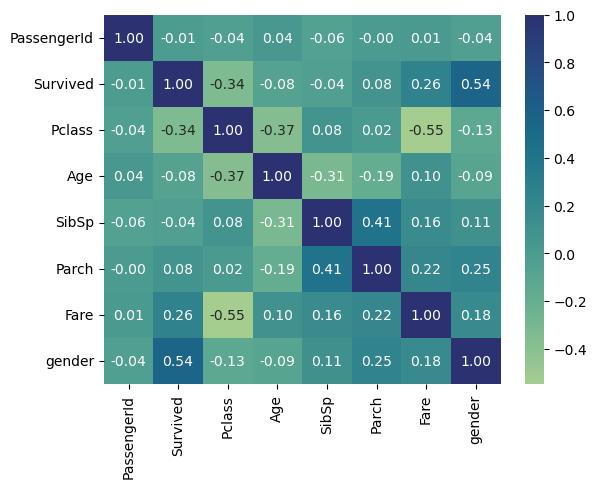

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(train_data.corr(),annot=True,cmap="crest",fmt=".2f")

- Data Preparation

In [105]:
# Age 결측치 처리
train_data.info() # Null 값 확인 (Age컬럼 , Cabin컬럼)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  gender       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [106]:
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

In [44]:
train_data['Age'].tail(10)

881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, dtype: float64

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  gender       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [59]:
train_data['gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: gender
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [107]:
train_data['gender']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: gender, Length: 891, dtype: int64

In [65]:
def evaluate(label, pred):
    return (label == pred).mean()

In [60]:
def model_1(df):
    df['Survived_1'] = df['gender'].apply(lambda x: 1 if x == 1 else 0)
    return df['Survived_1']

In [110]:
def model_2(df):
    result = ((df['gender'] == 1) | (df['Age'] < 16) & (df['Pclass'] == 2)).astype('int')
    return result

In [159]:
def model_3(df):
    result = (((df['gender'] == 1) & (df['Pclass'] != 3)) | ((df['Age'] < 16) & (df['Pclass'] == 2)) | ((df['gender'] == 0) & (df['Pclass'] == 1))).astype('int')
    return result

In [ ]:
# def model_3(df):
#     result = (((df['gender'] == 1) | (df['gender'] == 2)) | ((df['Age'] < 16) & (df['Pclass'] == 2)) | ((df['gender'] == 0) & (df['Pclass'] == 1))).astype('int')
#     return result

In [ ]:
#모델1: 여성이면 생존
# 모델2: 여성 OR '16세 미만이면서 pclass가 2' 일 때 생존
# 모델3: '여성이면서 pclass가 1이나 2' OR '16세 미만이면서 pclass가 2'OR '남성이면서 pclass가 1' 일 때 생존


In [116]:
evaluate(train_data['Survived'],model_1(train_data))

0.7867564534231201

In [115]:
evaluate(train_data['Survived'],model_2(train_data))

0.7968574635241302

In [160]:
evaluate(train_data['Survived'],model_3(train_data))

0.7609427609427609

In [125]:
test_data = pd.read_csv('test.csv')

In [129]:
test_data['gender'] = test_data['Sex'].apply(lambda x: 1 if x == 'female' else 0)

In [ ]:
# df = pd.read_csv('test.csv')
# df['Survived'] = 0
# df.loc[(df['Sex'] == 'female')|(df['Age'] <= 15),['Survived']] = 1
# submisson_df = df[['PassengerId','Survived']]
# submisson_df.to_csv('mysubmission3.csv',index=False)

In [134]:
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)

In [161]:
test_data['Survived'] = model_3(test_data)

In [162]:
Survived_df = test_data[['PassengerId','Survived']]

In [163]:
Survived_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [157]:
Survived_df.to_csv('model_3.csv',index=False)